<h1> MODULE IMPORT </h1>

In [3]:
import numpy as np
import pandas as pd

<h1>Pre Processing the data</h1>

<h1>Wrangling</h1>

In [6]:
# Reading the Data
df = pd.read_csv("E:\insaid\Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
# getting the dataframe shape
df.shape

(6362620, 11)

In [8]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


<h1>ANALYSIS</h1>

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [11]:
# getting more information on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<p>Clearly as we can see there are no NULL values</p>

In [13]:
# seperating the legit and fraud Transactions 

legit_transactions = len(df[df.isFraud == 0])
fraud_transactions = len(df[df.isFraud == 1])

legit_percentage = (legit_transactions/ (fraud_transactions + legit_transactions))*100
fraud_percentage = (fraud_transactions/ (fraud_transactions + legit_transactions))*100

print("Number of Legit transactions: ", legit_transactions)
print("Number of Fraud transactions: ", fraud_transactions)

print("Percentage of Legit transactions: {:.4f} %".format(legit_percentage))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percentage))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


<p>These results prove that there is a highly unbalanced data distribution as we can see the pecentage difference so we'll use DECISION TREES and RANDOM FOREST</p>

In [15]:
X = df[df['nameDest'].str.contains('M')]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


<p>for merchants there we cannot see any information about the oldbalanceDest and newbalanceDest variables</p>

<h1>VISUALISATION OF THESE</h1>

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# CORRELATION HEATMAP
corr = df.corr()
corr

C:\Users\harsh\AppData\Local\Temp\ipykernel_15652\1153376173.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

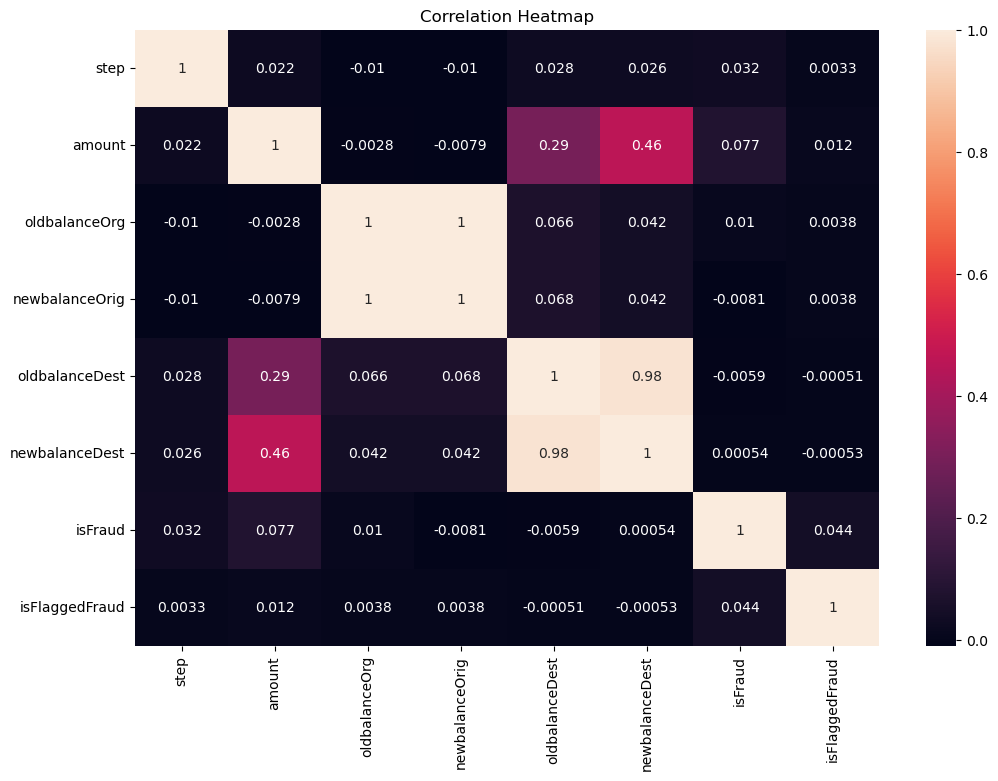

In [20]:
# Plotting heatmap

plt.figure(figsize = (12,8))
sns.heatmap(corr, annot = True)
plt.title("Correlation Heatmap")

<h2>Number of legit an Fraud Transactions</h2>

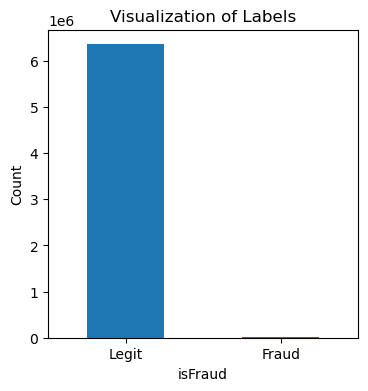

In [22]:
plt.figure(figsize = (4,4))
xlabels = ["Legit", "Fraud"]
count = df.value_counts(df['isFraud'], sort = True)
count.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), xlabels)
plt.show()

In [23]:
# Creating a copy of dataset to train and test model

df1 = df.copy()
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [24]:
df1.shape

(6362620, 11)

In [25]:
# Checking "object" type attributes

list_obj = df1.select_dtypes(include = "object").columns
list_obj

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<h2>Label encoding them to check for multicollinearity</h2> 

In [28]:
# Object to Numeric conversion

from sklearn.preprocessing import LabelEncoder

# creating a label encoder object
le = LabelEncoder()

for feature in list_obj:
    df1[feature] = le.fit_transform(df1[feature].astype(str))
    
print("complete")

complete


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


In [31]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


<h2> Multicollinearity </h2>

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return vif

calc_vif(df1)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


<p>As from the above data frame we can observer a high VIF in oldbalanceOrg and newBalanceOrg we can now come to a conclusion that they are highly correlated.</p>

<h2>Combining these pairs</h2>

In [ ]:
df1['organisation_act_amt'] = df1.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'], axis=1)

df1['destination_act_amt'] = df1.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'], axis = 1)

df1['Path_transaction'] = df1.apply(lambda x: x['nameOrig'] + x['nameDest'], axis=1)

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   step                  int64  
 1   type                  int32  
 2   amount                float64
 3   nameOrig              int32  
 4   oldbalanceOrg         float64
 5   newbalanceOrig        float64
 6   nameDest              int32  
 7   oldbalanceDest        float64
 8   newbalanceDest        float64
 9   isFraud               int64  
 10  isFlaggedFraud        int64  
 11  organisation_act_amt  float64
 12  destination_act_amt   float64
dtypes: float64(7), int32(3), int64(3)
memory usage: 558.2 MB


In [37]:
# Dropping individual columns
df1 = df1.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'step', 'nameOrig', 'nameDest'], axis=1)

calc_vif(df1)

,variables,VIF
0,type,1.092685
1,amount,3.760248
2,isFraud,1.176099
3,isFlaggedFraud,1.002478
4,organisation_act_amt,1.212137
5,destination_act_amt,3.692456


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 6 columns):
 #   Column                Dtype  
---  ------                -----  
 0   type                  int32  
 1   amount                float64
 2   isFraud               int64  
 3   isFlaggedFraud        int64  
 4   organisation_act_amt  float64
 5   destination_act_amt   float64
dtypes: float64(3), int32(1), int64(2)
memory usage: 267.0 MB


Text(0.5, 1.0, 'Correlation Heatmap')

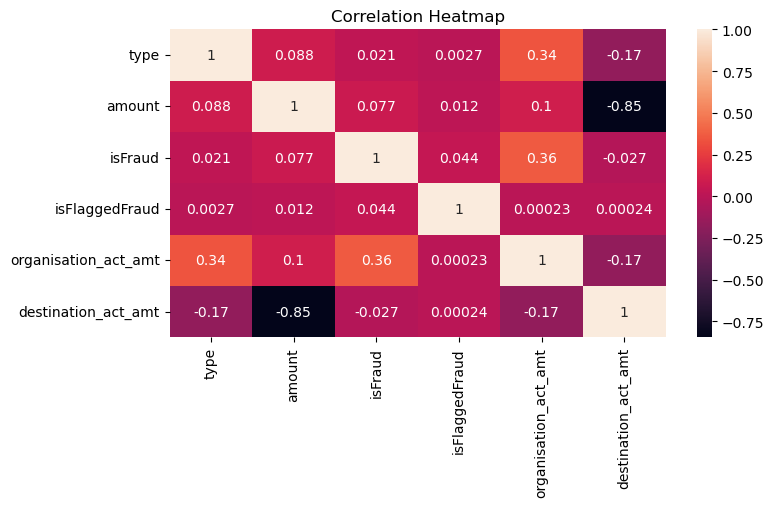

In [39]:
corr = df1.corr()

plt.figure(figsize=(8,4))
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")

<p>Using the VIF values and the correlation heatmap, we can check for the attributes that are highly correlated with each other and can drop the ones which are less in correlation with isFraud attribute.</p>

<h1>MODEL BUILDING</h1>

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools 
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

<h2>NORMALIZATION</h2>

In [44]:
# Scaling amount
scaler = StandardScaler()
df1["NormalizedAmount"] = scaler.fit_transform(df1["amount"].values.reshape(-1,1))

df1.drop(["amount"], inplace = True, axis = 1)

Y = df1["isFraud"]
X = df1.drop(["isFraud"], axis = 1)

In [45]:
print(X)

         type  isFlaggedFraud  organisation_act_amt  destination_act_amt  \
0           3               0               9839.64                 0.00   
1           3               0               1864.28                 0.00   
2           4               0                181.00                 0.00   
3           1               0                181.00             21182.00   
4           3               0              11668.14                 0.00   
...       ...             ...                   ...                  ...   
6362615     1               0             339682.13           -339682.13   
6362616     4               0            6311409.28                 0.00   
6362617     1               0            6311409.28          -6311409.27   
6362618     4               0             850002.52                 0.00   
6362619     1               0             850002.52           -850002.52   

         NormalizedAmount  
0               -0.281560  
1               -0.294767  
2  

In [46]:
print(Y)

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64


<h1> TRAIN TEST SPLIT </h1>

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [49]:
# analyzing the train and test shape

print("Shape of training data: ", X_train.shape)
print("Shape of test data: ", X_test.shape)

Shape of training data:  (4453834, 5)
Shape of test data:  (1908786, 5)


<h2>Training the model</h2>

In [51]:
# DECISION TREE

# Creating a Decision Tree Object

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test)*100

print("Complete!")

Complete!


In [52]:
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.92513566214338


In [53]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

print("Complete!")

Complete!


In [54]:
# Observing the scores of both the classifications

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.92513566214338
Random Forest Score:  99.93079370867137


In [58]:
# printing and comparing the true negatives, true positives and false negatives and false positives for Decision Tree and Random Forest

print("True negatives and positives for Decision Tree")

true_n, false_p, false_n, true_p = confusion_matrix(Y_test, Y_pred_dt).ravel()
print("")
print(f'True positives: {true_p}')
print(f'False positives: {false_p}')
print(f'True negatives: {true_n}')
print(f'false negatives: {false_n}')

print("")

print("True negatives and positives for Random Forest")

true_n, false_p, false_n, true_p = confusion_matrix(Y_test, Y_pred_rf).ravel()
print("")
print(f'True positives: {true_p}')
print(f'False positives: {false_p}')
print(f'True negatives: {true_n}')
print(f'false negatives: {false_n}')

True negatives and positives for Decision Tree

True positives: 1733
False positives: 727
True negatives: 1905624
false negatives: 702

True negatives and positives for Random Forest

True positives: 1733
False positives: 619
True negatives: 1905732
false negatives: 702


<h2>DRAWING CONCLUSIONS:</h2>
<p>
True positives of Decision tree ~ True positives of Random forest<br/>
True negatives of Decision tree < True negatives of Random forest<br/>
False positives of Decision tree >> False positives of Random forest<br/>
False negatives of Decision tree ~ False negatives of Random forest<br/>


Hence Random Forest is more suitable!</p>

<h2>Drawing Confusion Matrix</h2>

In [63]:
# Confusion Matrix for Decision Tree

dt_conf_matrix = confusion_matrix(Y_test, Y_pred_dt.round())
print("Decision Tree Confusion Matrix")
print(dt_conf_matrix)

print("")

# Confusion Matrix for Random Forest

rf_conf_matrix = confusion_matrix(Y_test, Y_pred_rf.round())
print("Random Forest Confusion Matrix")
print(rf_conf_matrix)


Decision Tree Confusion Matrix
[[1905624     727]
 [    702    1733]]

Random Forest Confusion Matrix
[[1905732     619]
 [    702    1733]]


In [67]:
# classification report for decision tree

dt_class_rep = classification_report(Y_test, Y_pred_dt)
print("Decision Tree Classification Tree")
print(dt_class_rep)

print("")

# classification report for random forest

rf_class_rep = classification_report(Y_test, Y_pred_rf)
print("Random Forest Classification Tree")
print(rf_class_rep)

Decision Tree Classification Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.70      0.71      0.71      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.86      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786


Random Forest Classification Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.74      0.71      0.72      2435

    accuracy                           1.00   1908786
   macro avg       0.87      0.86      0.86   1908786
weighted avg       1.00      1.00      1.00   1908786



<p>Comparing the above two results we get a good precision score and f1-score for Random Forest hence we can conclude that Random forest works better.</p>

<h2>Visualisation of confusion matrix</h2>

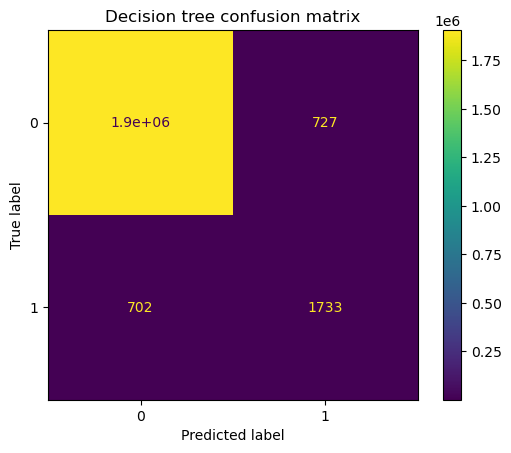

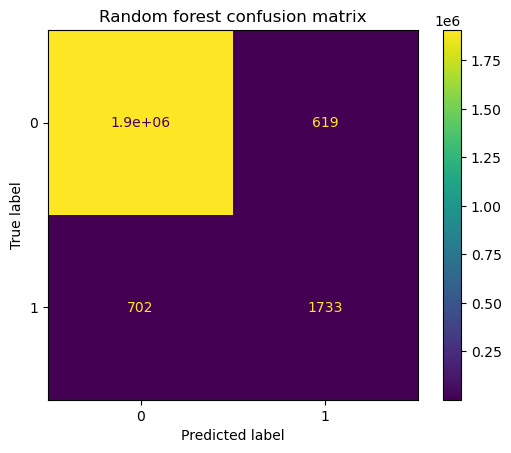

In [69]:
# for decision tree

graph = ConfusionMatrixDisplay(confusion_matrix=dt_conf_matrix)
graph.plot()
plt.title('Decision tree confusion matrix')
plt.show()


# for random forest

graph = ConfusionMatrixDisplay(rf_conf_matrix)
graph.plot()
plt.title('Random forest confusion matrix')
plt.show()

<h2>Area Under the Curve and Reciever Operating Characteristic</h2>

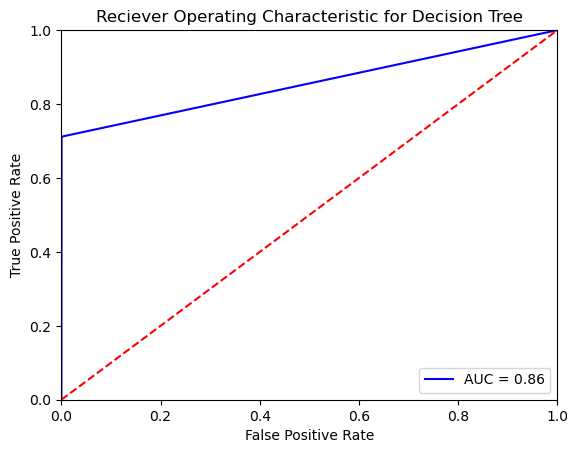

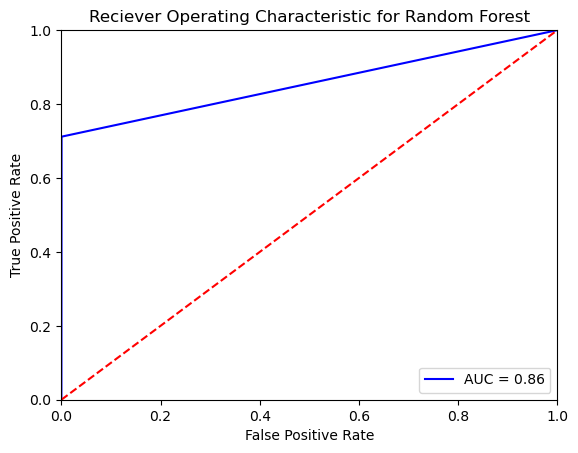

In [74]:
# for Decision Tree

# calculating the False Positive Rate and True Positive Rate for the classification

fpr, tpr, threshold_val = metrics.roc_curve(Y_test, Y_pred_dt)
roc_area = metrics.auc(fpr, tpr)

plt.title("Reciever Operating Characteristic for Decision Tree")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_area)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Area Under the Curve and Reciever Operating Characteristic

# for Random Forest

# calculating the False Positive Rate and True Positive Rate for the classification

fpr, tpr, threshold_val = metrics.roc_curve(Y_test, Y_pred_rf)
roc_area = metrics.auc(fpr, tpr)

plt.title("Reciever Operating Characteristic for Random Forest")
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_area)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


<p>As these models are both equal hence we can conclude that both are pretty good!</p>